## Description

This implementation that uses a class to refactor the model architecture and preprocessing methods. This is located in CNN_3_0.py

This version is trained on LaFleur_stacking_data.csv which LaFleur et al.'s base data and the predicted expression from Van Brempt et al. based on the spacer.

For X data, it onehot encodes base pairs in each element and appeneds them to a 2 dimensional array. It pads each element so that each element is the same length. This was a design decision that we changed later. The model is also trained on Van Brempt et al.'s prediction. The y data is the 'Observed' which is normalized using sklearn's MinMaxScaler (from 0, high expression to 1, low expression).

In [1]:
import CNN_3_0 as parent

/Users/tien/Documents/GitHub/promoter-sequence-transcription-rates/Synth_CURE_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# File path
filepath = '../Data/LaFleur_stacking_data.csv'

# Load and preprocess data
X, y, df, Prod_pred = parent.load_and_preprocess_data(filepath)

In [3]:
# Encode sequences
X_encoded, max_length = parent.encode_sequences(X, Prod_pred)

In [4]:
# print('X_encoded shape:', X_encoded.shape)
print(X_encoded[0])

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]
 [5 5 5 5]]


In [5]:
# Train-test split
X_train, X_test, y_train, y_test = parent.train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [6]:
# Only run if the model has not been trained before

# Build and train model
model = parent.build_model(input_shape=X_encoded.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)

# Save model
parent.save_model(model, 'CNN_3_0.keras')

Epoch 1/150


/Users/tien/Documents/GitHub/promoter-sequence-transcription-rates/Synth_CURE_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5826 - val_loss: 0.2140
Epoch 2/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1974 - val_loss: 0.2026
Epoch 3/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1851 - val_loss: 0.1709
Epoch 4/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1622 - val_loss: 0.1685
Epoch 5/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1580 - val_loss: 0.1538
Epoch 6/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1525 - val_loss: 0.1544
Epoch 7/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1446 - val_loss: 0.1671
Epoch 8/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1458 - val_loss: 0.2118
Epoch 9/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1400 - val_loss: 0.1519
Epoch 10/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1266 - val_loss: 0.1532
Epoch 11/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1315 - val_loss: 0.1490
Epoch 12/150
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [7]:
# Load model if needed, if not, this will load the just-saved model

model = parent.load_saved_model('CNN_3_0.keras')

In [8]:
# Evaluate model
loss = parent.evaluate_model(model, X_test, y_test)
print(f'Loss: {loss}')

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2524
Loss: 0.2478068619966507


In [9]:
# Make predictions
predictions_df = parent.make_predictions(model, X_encoded)

400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


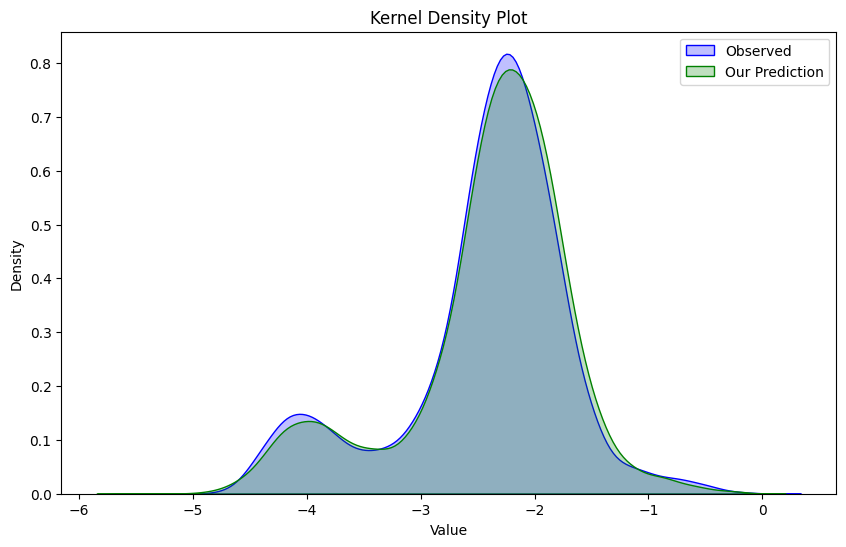

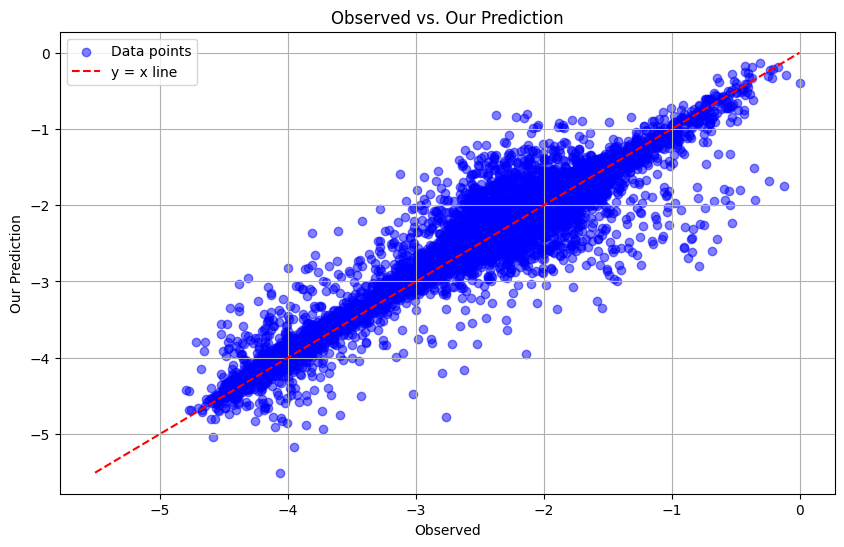

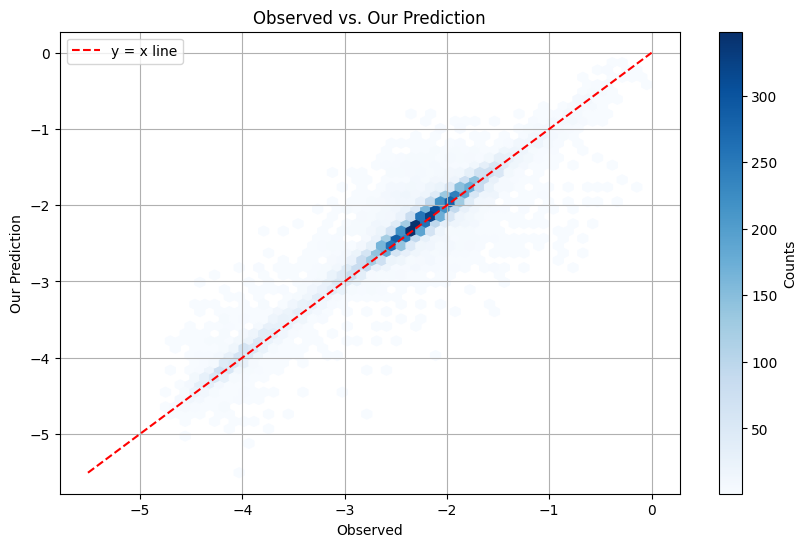

In [10]:
# Plot KDE and scatter plot
parent.plot_kde(df['Observed'], predictions_df['Value'])
parent.plot_scatter(df['Observed'].values, predictions_df['Value'].values)
parent.plot_scatter_density(df['Observed'].values, predictions_df['Value'].values)